# Question 3

In [14]:
#Packages Import
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame 

#Data frame of 6 countries and missing values
df = pd.read_csv('dataset.csv')
deu = df[(df.iso == 'DEU') | (df.iso == 'GBR')| (df.iso == 'AUT')| (df.iso == 'BEL')| (df.iso == 'ITA')|  (df.iso == 'SWE')]


new_data=deu.fillna(deu.mean())
new_data.columns

Index(['ccode', 'iso', 'year', 'govvote', 'oppvote', 'frac', 'partycount',
       'right', 'left', 'extr', 'protests', 'protestsdev', 'demosdev',
       'riotsdev', 'strikesdev', 'rgdp', 'gdppeak', 'crisisJST', 'pk_fin',
       'pk_norm', 'pk_dis', 'cpi', 'govcris', 'turnover', 'vetopl', 'dict',
       'election', 'election_year'],
      dtype='object')

# What factors affect the fractionalization of the Government Legislature?

In [15]:
list_graph = []
list_graph.clear()
#Target Value and Predictors
X = new_data[['partycount','right', 'left', 'extr', 'protests', 'crisisJST', 'turnover',
       'dict', 'riotsdev']]
Y = new_data.oppvote

In [16]:
#Sklearn Imports
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import SelectKBest, chi2

#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.25,random_state=0)

#Linear Regression
reg = LinearRegression()
reg = reg.fit(x_train,y_train)

prdct_y = reg.predict(x_test)
train = reg.score(x_train,y_train)
test = reg.score(x_test,y_test)
reg_err = mean_absolute_error(y_test,prdct_y)
print("RMSE: {:.2f}". format(reg_err))
print("Train Score: {:.2f}". format(train))
print("Test Score: {:.2f}". format(test))
list_graph.append(reg_err)

RMSE: 8.21
Train Score: 0.35
Test Score: 0.36


In [17]:
#Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=10, max_depth=9)
dtr = dtr.fit(x_train,y_train)

prediction = dtr.predict(x_test)
dtr_err = mean_absolute_error(y_test,prediction)
train = dtr.score(x_train,y_train)
test = dtr.score(x_test,y_test)
print('Decision Tree Regressor')
print("RMSE: {:.2f}". format(dtr_err))
print("Training Score: {:.2f}". format(train))
print("Testing Score: {:.2f}". format(test))
list_graph.append(dtr_err)

RMSE: 4.68
Training Score: 0.88
Testing Score: 0.64


In [18]:
# Gaussian Process Regressor
gpr = GaussianProcessRegressor()
gpr = gpr.fit(x_train,y_train)

predic = gpr.predict(x_test)
gpr_err = mean_absolute_error(y_test,predic)
train = gpr.score(x_train,y_train)
test = gpr.score(x_test,y_test)
print('Gaussian Process Regressor')
print("RMSE: {:.2f}". format(gpr_err))
print("Training Score: {:.2f}". format(train))
print("Testing Score: {:.2f}". format(test))
list_graph.append(gpr_err)

RMSE: 44.12
Training Score: 0.93
Testing Score: -158.97


In [19]:
#Random Forest Regressor
rfr = RandomForestRegressor(criterion='mse', max_depth=11, random_state=9)
rfr = rfr.fit(x_train,y_train)

predict = rfr.predict(x_test)

rfr_err = mean_absolute_error(y_test,predict)
train = rfr.score(x_train,y_train)
test = rfr.score(x_test,y_test)
print('Random Forest Regressor')
print("RMSE: {:.2f}". format(rfr_err))
print("Training Score: {:.2f}". format(train))
print("Testing Score: {:.2f}". format(test))
list_graph.append(rfr_err)

RMSE: 4.74
Training Score: 0.88
Testing Score: 0.75


C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


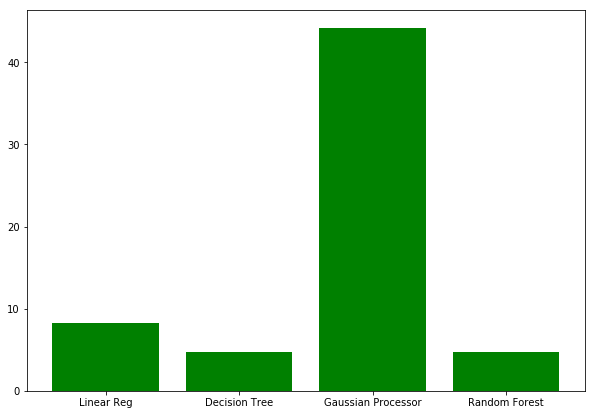

In [20]:
#Comparison Bar Plot
plt.subplots(figsize=(10,7))
x_g = ['Linear Reg', 'Decision Tree','Gaussian Processor','Random Forest']
y_g = list_graph
plt.bar(x_g,y_g,label='Algos', color='g')
plt.show()

In [ ]:
#Feature Selection

-------
1
0.10037759457008563
0.45668871929447485
-------
2
1.0
0.8746486031808626
-------
3
0.05444646990950828
0.8399843370496353
-------
4
0.7234043062924841
1.0
-------
5
0.004540488917584221
0.13386944770673295
-------
6
0.0022500288540034125
0.002423448176916961
-------
7
0.033306822457868576
0.09386405016160229
-------
8
0.8080775990300341
0.05760492173820881
-------
9
0.00030912214503089165
0.21986199967249037


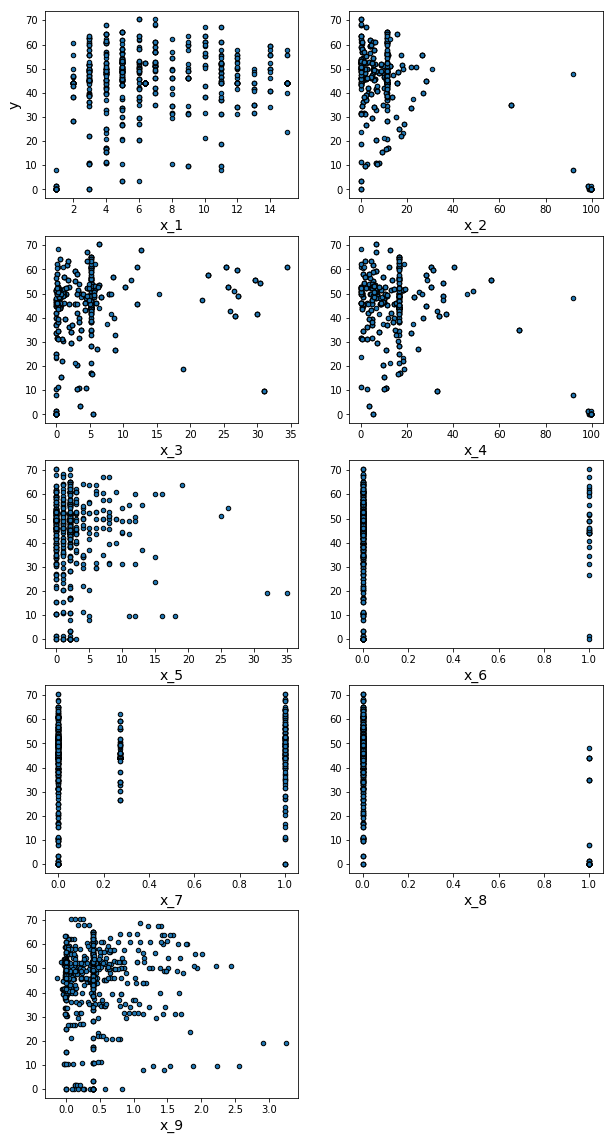

In [21]:
from sklearn.feature_selection import f_regression, mutual_info_regression


f_test, _ = f_regression(X, Y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, Y)
mi /= np.max(mi)

plt.figure(figsize=(10, 20))
for i in range(9):
    plt.subplot(5, 2, i + 1)
    plt.scatter(X.iloc[:, i], Y, edgecolor='black', s=20)
    print('-------')
    plt.xlabel("x_{}".format(i + 1), fontsize=14)
    
    if i == 0:
        plt.ylabel("y", fontsize=14)
    
    print(i+1)
    print(f_test[i])
    print(mi[i])
plt.show()


In [22]:
#Predictors after Feature Selection

In [23]:
list_graph1 = []
list_graph1.clear()


X1 = new_data[['right', 'left', 'extr']]
Y1 = new_data.oppvote


In [24]:
#Linear Regression
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,Y1,test_size=.25,random_state=0)
reg1 = LinearRegression()
reg1 = reg1.fit(x_train1,y_train1)

prdct_y = reg1.predict(x_test1)
reg_err = mean_absolute_error(y_test1,prdct_y)
train1 = reg1.score(x_train1,y_train1)
test1 = reg1.score(x_test1,y_test1)
print('Linear Regressor after Feature Selection')
print("RMSE: {:.2f}". format(reg_err))
print("Training Score: {:.2f}". format(train1))
print("Testing Score: {:.2f}". format(test1))
list_graph1.append(reg_err)

RMSE: 8.14
Training Score: 0.33
Testing Score: 0.33


In [25]:
#Decision Tree
dtr1 = DecisionTreeRegressor(random_state=10, max_depth=35)
dtr1 = dtr1.fit(x_train1,y_train1)

prediction = dtr1.predict(x_test1)
dtr_err = mean_absolute_error(y_test1,prediction)
train1 = dtr1.score(x_train1,y_train1)
test1 = dtr1.score(x_test1,y_test1)
print('Decision Tree Regressor after Feature Selection')
print("RMSE: {:.2f}". format(dtr_err))
print("Training Score: {:.2f}". format(train1))
print("Testing Score: {:.2f}". format(test1))
list_graph1.append(dtr_err)

RMSE: 3.27
Training Score: 0.84
Testing Score: 0.77


In [26]:
#Gaussian Process
gpr1 = GaussianProcessRegressor()
gpr1 = gpr1.fit(x_train1,y_train1)

predic = gpr1.predict(x_test1)
gpr_err = mean_absolute_error(y_test1,predic)
train1 = gpr1.score(x_train1,y_train1)
test1 = gpr1.score(x_test1,y_test1)

print('Gaussian Process Regressor after Feature Selection')
print("RMSE: {:.2f}". format(gpr_err))
print("Training Score: {:.2f}". format(train1))
print("Testing Score: {:.2f}". format(test1))
list_graph1.append(gpr_err)

RMSE: 17.09
Training Score: 0.84
Testing Score: -36.86


In [27]:
#Random Forest
rfr1 = RandomForestRegressor(criterion='mse', max_depth=20, random_state=10)
rfr1 = rfr1.fit(x_train1,y_train1)

predict = rfr1.predict(x_test1)

rfr_err = mean_absolute_error(y_test1,predict)
train1 = rfr1.score(x_train1,y_train1)
test1 = rfr1.score(x_test1,y_test1)

print('Random Forest Regressor after Feature Selection')
print("RMSE: {:.2f}". format(rfr_err))
print("Training Score: {:.2f}". format(train1))
print("Testing Score: {:.2f}". format(test1))
list_graph1.append(rfr_err)

RMSE: 4.28
Training Score: 0.82
Testing Score: 0.76


C:\Users\Aneeba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


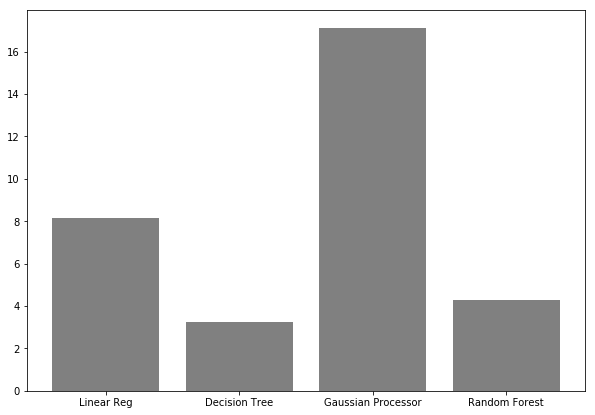

In [28]:
#Comparison After Feature Selection
plt.subplots(figsize=(10,7))
x_gr = ['Linear Reg', 'Decision Tree','Gaussian Processor','Random Forest']
y_gr = list_graph1
plt.bar(x_gr,y_gr,label='Algos', color='grey')
plt.show()